Here deterministic strategies: Random, RandomInTree (by Vlad), RandomOuter, RandomInner
For ω_n (I ... I)_m define n == m for, where n is [2, 20]

# Import the dependencies

In [1]:
import sys
from tqdm import tqdm

sys.path.append("../")
from calculus_path_mod.term_engine import *
from calculus_path_mod.reduction_strategy import *

Lambda = Abstraction
App = Application

# Defining test term:
    ω_n (I ... I)_m

In [2]:
def i_term():
    x = Var()
    x_ = Atom(x)
    return Lambda(x, x_)


def omega_term(n: int):
    x = Var()
    x_ = Atom(x)
    body_app_term = x_
    for _ in range(n - 1):
        body_app_term = App(body_app_term, x_)
    return Lambda(x, body_app_term)


def multi_i_term(m: int):
    app_term = i_term()
    for _ in range(m - 1):
        app_term = App(app_term, i_term())
    return app_term


def omega_multi_i_term(n: int, m: int):
    return App(omega_term(n), multi_i_term(m))

# Drawing stuff

In [3]:
import matplotlib.pyplot as plt


def draw_mult_lines(
    comp_data: dict, title="title", x_label="x_label", y_label="y_label"
):
    for key in comp_data.keys():
        plt.plot(
            range(2, len(comp_data[key][0]) + 2), comp_data[key][0], comp_data[key][1], label=key
        )

    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend(loc="upper right")
    plt.show()

# Run through strategies
## RandomOuter

In [4]:
nm_pairs = [(x, x) for x in range(2, 5+2)]

In [5]:
random_outer_steps = []
strategy = RandomOuterStrategy()
count_tries = 1
for n, m in tqdm(nm_pairs):
    print(f"\n@@@@ Term n=m={n}")
    total_steps = 0
    term = omega_multi_i_term(n, m)
    for _ in range(count_tries):
        _, norm_steps = term.normalize(strategy, is_limited=False)
        total_steps += norm_steps
    random_outer_steps.append(total_steps / count_tries)

100%|██████████| 5/5 [00:00<00:00, 156.25it/s]


@@@@ Term n=m=2
depth=[1, 2] -> indexes=[1, 6] probs=[0.73105858 0.26894142] choose=6
depth=[1] -> indexes=[1] probs=[1.] choose=1
depth=[1] -> indexes=[1] probs=[1.] choose=1

@@@@ Term n=m=3
depth=[1, 3] -> indexes=[1, 9] probs=[0.88079708 0.11920292] choose=1
depth=[4, 4, 3] -> indexes=[4, 12, 20] probs=[0.21194156 0.21194156 0.57611688] choose=20
depth=[4, 4, 2] -> indexes=[4, 12, 19] probs=[0.10650698 0.10650698 0.78698604] choose=19
depth=[4, 4] -> indexes=[4, 12] probs=[0.5 0.5] choose=12
depth=[4, 3] -> indexes=[4, 11] probs=[0.26894142 0.73105858] choose=11
depth=[4] -> indexes=[4] probs=[1.] choose=4
depth=[3] -> indexes=[3] probs=[1.] choose=3
depth=[2] -> indexes=[2] probs=[1.] choose=2
depth=[1] -> indexes=[1] probs=[1.] choose=1

@@@@ Term n=m=4
depth=[1, 4] -> indexes=[1, 12] probs=[0.95257413 0.04742587] choose=1
depth=[6, 6, 5, 4] -> indexes=[6, 17, 28, 39] probs=[0.08259454 0.08259454 0.22451524 0.61029569] choose=39
depth=[6, 6, 5, 3] -> indexes=[6, 17, 28, 38] prob

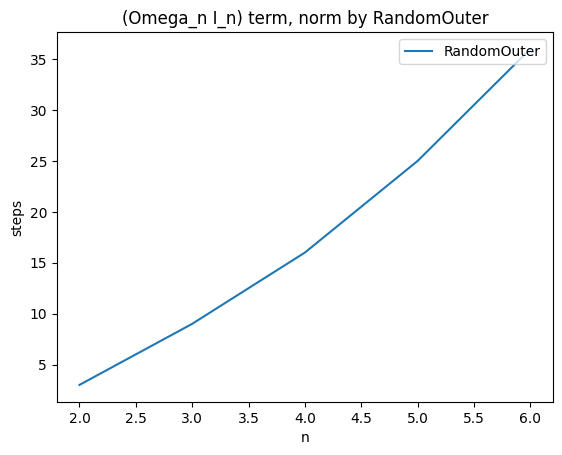

In [6]:
context = {
    "RandomOuter": (random_outer_steps, "-"),
}

draw_mult_lines(comp_data=context, title="(Omega_n I_n) term, norm by RandomOuter", x_label="n", y_label="steps")

## RandomInner

In [7]:
random_inner_steps = []
strategy = RandomInnerStrategy()
count_tries = 1
for n, m in tqdm(nm_pairs):
    print(f"\n@@@@ Term n=m={n}")
    total_steps = 0
    term = omega_multi_i_term(n, m)
    for _ in range(count_tries):
        _, norm_steps = term.normalize(strategy, is_limited=False)
        total_steps += norm_steps
    random_inner_steps.append(total_steps / count_tries)

100%|██████████| 5/5 [00:00<00:00, 714.39it/s]


@@@@ Term n=m=2
depth=[1, 2] -> indexes=[1, 6] probs=[0.26894142 0.73105858] choose=1
depth=[2, 2] -> indexes=[2, 7] probs=[0.5 0.5] choose=2
depth=[1, 2] -> indexes=[1, 4] probs=[0.26894142 0.73105858] choose=4
depth=[1] -> indexes=[1] probs=[1.] choose=1

@@@@ Term n=m=3
depth=[1, 3] -> indexes=[1, 9] probs=[0.11920292 0.88079708] choose=9
depth=[1, 2] -> indexes=[1, 8] probs=[0.26894142 0.73105858] choose=8
depth=[1] -> indexes=[1] probs=[1.] choose=1
depth=[2] -> indexes=[2] probs=[1.] choose=2
depth=[1] -> indexes=[1] probs=[1.] choose=1

@@@@ Term n=m=4
depth=[1, 4] -> indexes=[1, 12] probs=[0.04742587 0.95257413] choose=12
depth=[1, 3] -> indexes=[1, 11] probs=[0.11920292 0.88079708] choose=11
depth=[1, 2] -> indexes=[1, 10] probs=[0.26894142 0.73105858] choose=10
depth=[1] -> indexes=[1] probs=[1.] choose=1
depth=[3] -> indexes=[3] probs=[1.] choose=3
depth=[2] -> indexes=[2] probs=[1.] choose=2
depth=[1] -> indexes=[1] probs=[1.] choose=1

@@@@ Term n=m=5
depth=[1, 5] -> inde

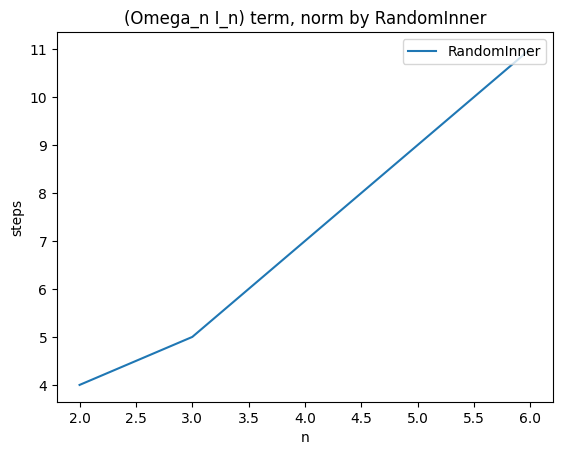

In [8]:
context = {
    "RandomInner": (random_inner_steps, "-"),
}

draw_mult_lines(comp_data=context, title="(Omega_n I_n) term, norm by RandomInner", x_label="n", y_label="steps")

# Plot graphics comparisons

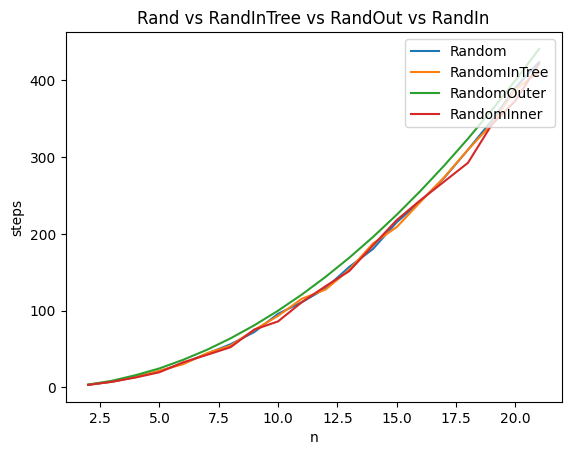

In [13]:
context = {
    "Random": (random_steps, "-"),
    "RandomInTree": (random_in_tree_steps, "-"),
    "RandomOuter": (random_outer_steps, "-"),
    "RandomInner": (random_inner_steps, "-"),
}

draw_mult_lines(comp_data=context, title="Rand vs RandInTree vs RandOut vs RandIn", x_label="n", y_label="steps")

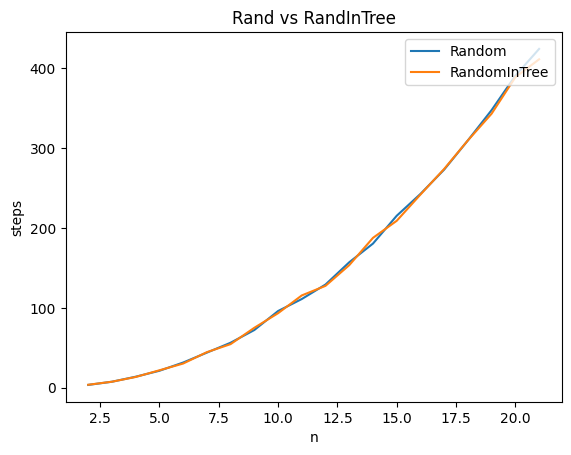

In [14]:
context = {
    "Random": (random_steps, "-"),
    "RandomInTree": (random_in_tree_steps, "-"),
}

draw_mult_lines(comp_data=context, title="Rand vs RandInTree", x_label="n", y_label="steps")

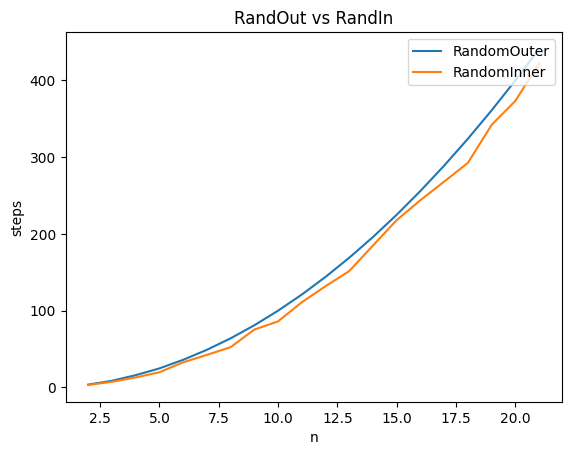

In [15]:
context = {
    "RandomOuter": (random_outer_steps, "-"),
    "RandomInner": (random_inner_steps, "-"),
}

draw_mult_lines(comp_data=context, title="RandOut vs RandIn", x_label="n", y_label="steps")